# Import packages
run the following cell to import necessary packages to run the analysis

In [1]:
import os
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from pathlib import Path
from pylibCZIrw import czi as pyczi
from tqdm.notebook import tqdm

# Setup
change the variables to the correct values.
Set the right image size (`x` and `y` size) and the correct pixel size

In [2]:
path = Path('/media/npmartins/Data/nuno_martins/Image_data/NPM_Ex004_Re04/')
filelist = os.listdir(path)
print(len(filelist))

21


In [3]:
filelist = [x for x in filelist if x.find('.czi')>0]
filelist.sort()
filelist

['NPM_Ex004_Re04_gel2_HexA1_A1_Im01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C1_Im01-Airyscan Processing-01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C1_Im01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im01-Airyscan Processing-02.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im02-Airyscan Processing-03.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im02.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im03-Airyscan Processing-04.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im03.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im04-Airyscan Processing-01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im04.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im05-Airyscan Processing-03.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im05.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im06-Airyscan Processing-02.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im06.czi',
 'NPM_Ex004_Re04_hexa1_gel1_overview.czi',
 'NPM_Ex004_Re04_hexa1_gel1_tiles_20x.czi',
 'NPM_Ex004_Re04_hexa2_gel2_overview.czi',
 'NPM_Ex004_Re04_hexa2_gel2_tiles_20x.czi']

In [4]:
file_index = len(filelist)-1
# file_index = 10
# str(path)+'/'+filelist[file_index]
file_path = str(path)+'/'+filelist[file_index]
print(file_path)

/media/npmartins/Data/nuno_martins/Image_data/NPM_Ex004_Re04/NPM_Ex004_Re04_hexa2_gel2_tiles_20x.czi


read file metadata and save as xml file

In [15]:
#open and save Metadata as xml file for manual checking
with pyczi.open_czi(str(path)+'/'+filelist[file_index]) as czidoc:
    md_xml = czidoc.raw_metadata

# md_xml

with open(str(path)+'/xml_metadata.xml', 'w') as outputfile:
    outputfile.write(md_xml)

In [5]:
with pyczi.open_czi(str(path)+'/'+filelist[file_index]) as czidoc:
    md_dic = czidoc.metadata
    # print(md_xml[:1000])
    dims_all = czidoc.scenes_bounding_rectangle_no_pyramid
    print(dims_all)
    bd = czidoc.scenes_bounding_rectangle
    print(bd)
    tbd = czidoc.total_bounding_box
    print(tbd)
    pixel_types = czidoc.pixel_types
    print(pixel_types)

{0: Rectangle(x=3852, y=0, w=2355, h=1895), 1: Rectangle(x=7629, y=265, w=1434, h=1434), 2: Rectangle(x=4388, y=2689, w=2816, h=2355), 3: Rectangle(x=0, y=3522, w=2816, h=1895), 4: Rectangle(x=3305, y=4398, w=2355, h=1894), 5: Rectangle(x=5851, y=4890, w=1895, h=1894), 6: Rectangle(x=7448, y=4944, w=3277, h=2355), 7: Rectangle(x=2998, y=6163, w=2816, h=1894), 8: Rectangle(x=6187, y=7045, w=5581, h=3277), 9: Rectangle(x=2481, y=7789, w=2355, h=2355), 10: Rectangle(x=7, y=7863, w=2816, h=2816), 11: Rectangle(x=7388, y=10656, w=1894, h=972), 12: Rectangle(x=9102, y=10726, w=1895, h=1434), 13: Rectangle(x=4875, y=10820, w=2816, h=1895), 14: Rectangle(x=1657, y=12374, w=1895, h=1895)}
{0: Rectangle(x=3852, y=0, w=2356, h=1896), 1: Rectangle(x=7629, y=265, w=1434, h=1434), 2: Rectangle(x=4388, y=2689, w=2816, h=2356), 3: Rectangle(x=0, y=3522, w=2816, h=1896), 4: Rectangle(x=3305, y=4398, w=2356, h=1896), 5: Rectangle(x=5851, y=4890, w=1896, h=1894), 6: Rectangle(x=7448, y=4944, w=3280, h=23

In [6]:
dims_all

{0: Rectangle(x=3852, y=0, w=2355, h=1895),
 1: Rectangle(x=7629, y=265, w=1434, h=1434),
 2: Rectangle(x=4388, y=2689, w=2816, h=2355),
 3: Rectangle(x=0, y=3522, w=2816, h=1895),
 4: Rectangle(x=3305, y=4398, w=2355, h=1894),
 5: Rectangle(x=5851, y=4890, w=1895, h=1894),
 6: Rectangle(x=7448, y=4944, w=3277, h=2355),
 7: Rectangle(x=2998, y=6163, w=2816, h=1894),
 8: Rectangle(x=6187, y=7045, w=5581, h=3277),
 9: Rectangle(x=2481, y=7789, w=2355, h=2355),
 10: Rectangle(x=7, y=7863, w=2816, h=2816),
 11: Rectangle(x=7388, y=10656, w=1894, h=972),
 12: Rectangle(x=9102, y=10726, w=1895, h=1434),
 13: Rectangle(x=4875, y=10820, w=2816, h=1895),
 14: Rectangle(x=1657, y=12374, w=1895, h=1895)}

In [8]:
dims_all[0]

Rectangle(x=3852, y=0, w=2355, h=1895)

In [36]:
with pyczi.open_czi(str(path)+'/'+filelist[file_index]) as cziimg:
    img = cziimg.read(
        plane={"C": 3, "T": 0, "Z": 0},
        scene=0,
    )

img.shape

(1896, 2356, 1)

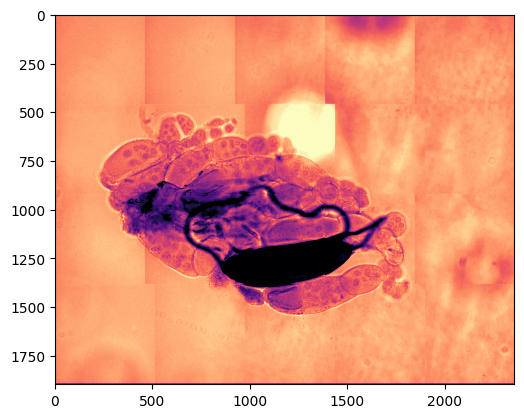

In [37]:
plt.imshow(
    img,
    cmap='magma',
    vmin=np.percentile(img, 3),
    vmax=np.percentile(img, 99),
)

In [11]:
width = dims_all[0][2]
height = dims_all[0][-1]
channels = tbd['C'][-1]
planes = tbd['Z'][-1]

width, height, channels, planes

(2355, 1895, 4, 1)

In [ ]:
img = np.zeros()

with pyczi.open_czi(str(path)+'/'+filelist[file_index]) as cziimg:
    img = cziimg.read(scene=0)

use `cztile` package to automatically get ROIs for tiling

In [10]:
# import cztile
from cztile.fixed_total_area_strategy import AlmostEqualBorderFixedTotalAreaStrategy2D

In [76]:
tiler = AlmostEqualBorderFixedTotalAreaStrategy2D(
    total_tile_width=512,
    total_tile_height=512,
    min_border_width=(512*0.05),
)

with pyczi.open_czi(file_path) as czidoc_read:
    tiles = tiler.tile_rectangle(czidoc_read.scenes_bounding_rectangle[0])

print(len(tiles))

index = 0
for tile in tiles:
    # print(index, tile.roi.x, tile.roi.y, tile.roi.w, tile.roi.h)
    print(index, tile.roi)
    index+=1

30
0 Rectangle(x=3852, y=0, w=512, h=512)
1 Rectangle(x=3852, y=347, w=512, h=512)
2 Rectangle(x=3852, y=693, w=512, h=512)
3 Rectangle(x=3852, y=1039, w=512, h=512)
4 Rectangle(x=3852, y=1384, w=512, h=512)
5 Rectangle(x=4221, y=0, w=512, h=512)
6 Rectangle(x=4221, y=347, w=512, h=512)
7 Rectangle(x=4221, y=693, w=512, h=512)
8 Rectangle(x=4221, y=1039, w=512, h=512)
9 Rectangle(x=4221, y=1384, w=512, h=512)
10 Rectangle(x=4590, y=0, w=512, h=512)
11 Rectangle(x=4590, y=347, w=512, h=512)
12 Rectangle(x=4590, y=693, w=512, h=512)
13 Rectangle(x=4590, y=1039, w=512, h=512)
14 Rectangle(x=4590, y=1384, w=512, h=512)
15 Rectangle(x=4959, y=0, w=512, h=512)
16 Rectangle(x=4959, y=347, w=512, h=512)
17 Rectangle(x=4959, y=693, w=512, h=512)
18 Rectangle(x=4959, y=1039, w=512, h=512)
19 Rectangle(x=4959, y=1384, w=512, h=512)
20 Rectangle(x=5328, y=0, w=512, h=512)
21 Rectangle(x=5328, y=347, w=512, h=512)
22 Rectangle(x=5328, y=693, w=512, h=512)
23 Rectangle(x=5328, y=1039, w=512, h=512)


In [77]:
image_tiles = []

with pyczi.open_czi(file_path) as czidoc_read:
    for tile in tqdm(tiles):
        tile2d = czidoc_read.read(
            plane={"C": 3, "T":0, "Z":0,},
            roi=(
                tile.roi.x,
                tile.roi.y,
                tile.roi.w,
                tile.roi.h
            )
        )
        image_tiles.append(tile2d)

  0%|          | 0/30 [00:00<?, ?it/s]

In [78]:
print(len(image_tiles))
print(image_tiles[0].shape)

30
(512, 512, 1)


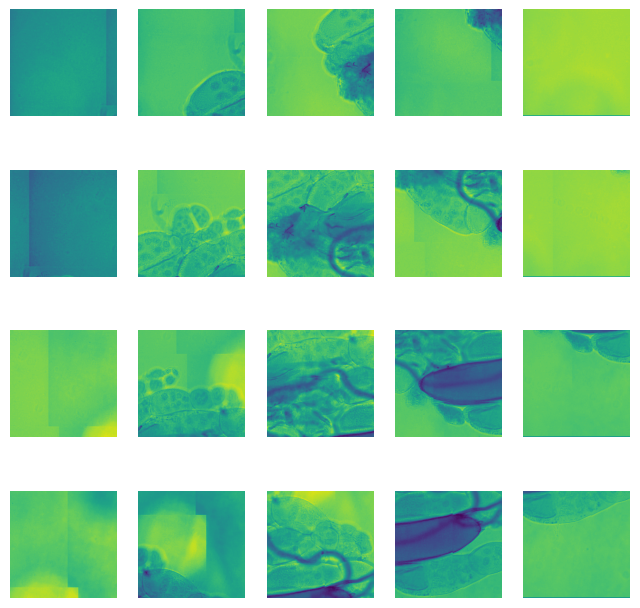

In [79]:
h, w = 4, 5
index = 0

fig = plt.figure(figsize=(8,8))
for i in range(h):
    for j in range(w):
        plt.subplot(h, w, i * w + j + 1)
        img = image_tiles[index]
        # if pmin!=0 or pmax!=100:
        #     img = normalize(img,pmin=pmin,pmax=pmax,clip=True)
        plt.imshow(img)
        plt.axis("off")
        index+=1

___
# Allen Cell modelling library
Using `aicspylibczi` package instead

In [44]:
from aicspylibczi import CziFile

czi = CziFile(file_path)

In [46]:
czi.dims

'HSTCZMYX'

In [48]:
czi.get_dims_shape()

[{'X': (0, 512),
  'Y': (0, 512),
  'Z': (0, 1),
  'C': (0, 4),
  'T': (0, 1),
  'M': (0, 20),
  'S': (0, 1),
  'H': (0, 1)},
 {'X': (0, 512),
  'Y': (0, 512),
  'Z': (0, 1),
  'C': (0, 4),
  'T': (0, 1),
  'M': (0, 9),
  'S': (1, 2),
  'H': (0, 1)},
 {'X': (0, 512),
  'Y': (0, 512),
  'Z': (0, 1),
  'C': (0, 4),
  'T': (0, 1),
  'M': (0, 26),
  'S': (2, 3),
  'H': (0, 1)},
 {'X': (0, 512),
  'Y': (0, 512),
  'Z': (0, 1),
  'C': (0, 4),
  'T': (0, 1),
  'M': (0, 23),
  'S': (3, 4),
  'H': (0, 1)},
 {'X': (0, 512),
  'Y': (0, 512),
  'Z': (0, 1),
  'C': (0, 4),
  'T': (0, 1),
  'M': (0, 20),
  'S': (4, 5),
  'H': (0, 1)},
 {'X': (0, 512),
  'Y': (0, 512),
  'Z': (0, 1),
  'C': (0, 4),
  'T': (0, 1),
  'M': (0, 16),
  'S': (5, 6),
  'H': (0, 1)},
 {'X': (0, 512),
  'Y': (0, 512),
  'Z': (0, 1),
  'C': (0, 4),
  'T': (0, 1),
  'M': (0, 33),
  'S': (6, 7),
  'H': (0, 1)},
 {'X': (0, 512),
  'Y': (0, 512),
  'Z': (0, 1),
  'C': (0, 4),
  'T': (0, 1),
  'M': (0, 21),
  'S': (7, 8),
  'H': (0

In [60]:

# read a single tile-zstack + channels from the complete CZI
tile_zstack_with_channels, size = czi.read_image(S=0, M=7)

In [52]:
print(size)

[('H', 1), ('S', 1), ('T', 1), ('C', 4), ('Z', 1), ('M', 1), ('Y', 512), ('X', 512)]


In [63]:
tile_zstack_with_channels = tile_zstack_with_channels.squeeze()
tile_zstack_with_channels.shape

(4, 512, 512)

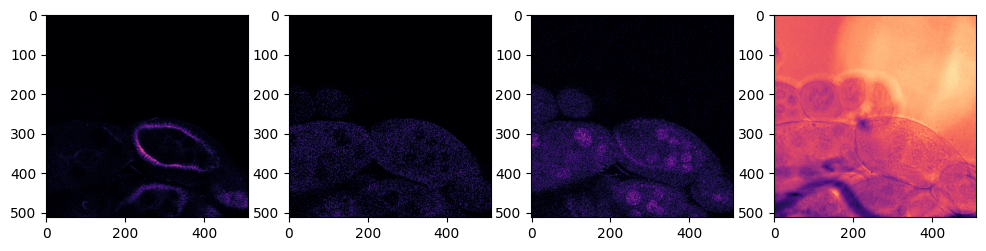

In [67]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,4,1)
plt.imshow(
    tile_zstack_with_channels[0, ...],
    cmap='magma',
)
fig.add_subplot(1,4,2)
plt.imshow(
    tile_zstack_with_channels[1, ...],
    cmap='magma',
)
fig.add_subplot(1,4,3)
plt.imshow(
    tile_zstack_with_channels[2, ...],
    cmap='magma',
)
fig.add_subplot(1,4,4)
plt.imshow(
    tile_zstack_with_channels[3, ...],
    cmap='magma',
)

___
# `bioio` package


In [5]:
from bioio import BioImage
import bioio_czi

In [82]:
img = BioImage(file_path, reader=bioio_czi.Reader, reconstruct_mosaic=False)
img.dims

<Dimensions [M: 20, T: 1, C: 4, Z: 1, Y: 512, X: 512]>

In [83]:
img.shape

(20, 1, 4, 1, 512, 512)

In [84]:
img.scenes

('TR1',
 'TR2',
 'TR3',
 'TR4',
 'TR5',
 'TR6',
 'TR7',
 'TR8',
 'TR11',
 'TR10',
 'TR9',
 'TR13',
 'TR14',
 'TR12',
 'TR15')

In [85]:
# img.scenes
for scene in img.scenes:
    img.set_scene(scene)
    print(img.dims)

<Dimensions [M: 20, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 9, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 26, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 23, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 20, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 16, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 33, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 21, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 81, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 23, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 31, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 8, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 12, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 23, T: 1, C: 4, Z: 1, Y: 512, X: 512]>
<Dimensions [M: 15, T: 1, C: 4, Z: 1, Y: 512, X: 512]>


In [86]:
img.set_scene(0)
image = img.data
image = image.squeeze()
image.shape

(20, 4, 512, 512)

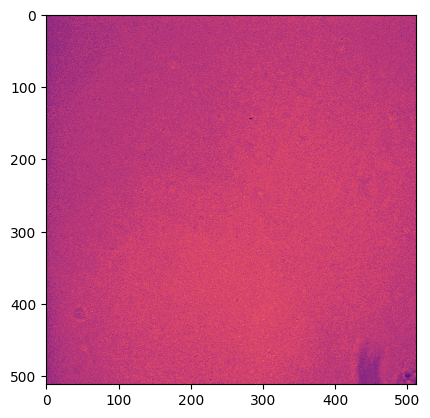

In [90]:
plt.imshow(
    image[0, 3, ...],
    cmap='magma',
)

In [75]:
img.mosaic_tile_dims


<Dimensions [Y: 512, X: 512]>

In [76]:
img.get_mosaic_tile_positions()


[(0, 3852),
 (0, 4313),
 (0, 4774),
 (0, 5235),
 (0, 5695),
 (461, 5695),
 (461, 5235),
 (461, 4774),
 (461, 4313),
 (461, 3852),
 (922, 3852),
 (922, 4313),
 (922, 4774),
 (922, 5235),
 (922, 5695),
 (1383, 5695),
 (1383, 5235),
 (1383, 4774),
 (1383, 4313),
 (1383, 3852)]

In [81]:
img.dims.order

'TCZYX'

In [80]:
image = img.dask_data
image.shape

(1, 4, 1, 1895, 2355)